In [34]:
# Video Evaluation. Needs "videos_clean.csv" as input.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import researchpy as rp
from scipy import stats

# set the format for pandas float 
pd.options.display.float_format = '{:,.3f}'.format


# change font to latex font
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

# change font sizes for all elements
TICKS_AND_LEGEND_SIZE = 16
AXES_TITLE_SIZE = 22
PLOT_TITLE_SIZE = 22

plt.rc('font', size=TICKS_AND_LEGEND_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=PLOT_TITLE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=AXES_TITLE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICKS_AND_LEGEND_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICKS_AND_LEGEND_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TICKS_AND_LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=PLOT_TITLE_SIZE)  # fontsize of the figure title

In [35]:
# read in video csv file
df = pd.read_csv("ar_feedback_data.csv")

# check data
print('shape', df.shape)
df.head(5)

shape (40, 63)


,phone,count,lvl,implementation,date,timestamp,issues,offscreen,1_Age,2_priorExp,...,m2_hint_ar,m2_pinch,m2_tfr,m2_offscrn,m3_time,m3_hint_pt,m3_hint_ar,m3_pinch,m3_tfr,m3_offscrn
0,0,2,1,MT1,05.02.20,12:20,NaN,1,18,0,...,0,0,0,0,117,0,0,0,0,0
1,0,3,1,TM1,05.02.20,12:48,NaN,0,21,1,...,0,0,0,0,145,1,0,0,0,0
2,0,4,2,TM2,05.02.20,13:04,NaN,0,23,1,...,0,0,0,0,83,0,0,0,0,0
3,0,5,0,TM0,05.02.20,13:22,NaN,0,23,1,...,0,0,0,0,18,0,0,0,0,0
4,0,6,1,MT1,05.02.20,14:22,NaN,1,22,0,...,0,0,0,1,81,0,0,0,0,0


APPEARANCES OF TWO-FINGER ROTATION AND PINCH ZOOMS PER TASK


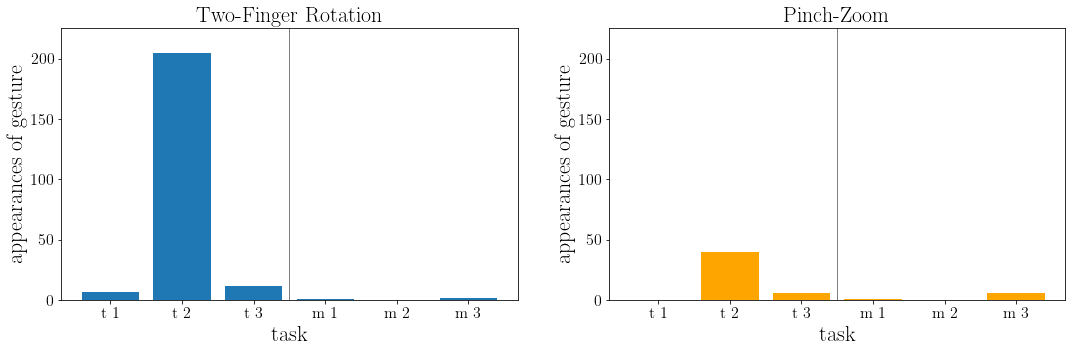

In [36]:
print('APPEARANCES OF TWO-FINGER ROTATION AND PINCH ZOOMS PER TASK')
TFR = [df.loc[:,"t1_tfr"].sum(), df.loc[:,"t2_tfr"].sum(), df.loc[:,"t3_tfr"].sum(), df.loc[:,"m1_tfr"].sum(), df.loc[:,"m2_tfr"].sum(), df.loc[:,"m3_tfr"].sum()]
PZ = [df.loc[:,"t1_pinch"].sum(), df.loc[:,"t2_pinch"].sum(), df.loc[:,"t3_pinch"].sum(), df.loc[:,"m1_pinch"].sum(), df.loc[:,"m2_pinch"].sum(), df.loc[:,"m3_pinch"].sum()]

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].bar(height=TFR, x=["t 1","t 2","t 3","m 1","m 2","m 3"])
axs[0].set_ylim([0,225])
axs[0].axvline(x=2.5, linewidth=0.5, color='black')
axs[0].set_title("Two-Finger Rotation")
axs[0].set_xlabel("task")
axs[0].set_ylabel("appearances of gesture")

axs[1].bar(height=PZ, x=["t 1","t 2","t 3","m 1","m 2","m 3"], color='orange')
axs[1].set_ylim([0,225])
axs[1].axvline(x=2.5, linewidth=0.5, color='black')
axs[1].set_title("Pinch-Zoom")
axs[1].set_xlabel("task")
axs[1].set_ylabel("appearances of gesture")

plt.show()

BOXPLOTS FOR GESTURE APPEARANCES AND TIMES PER TASK - FOR ALL TASKS


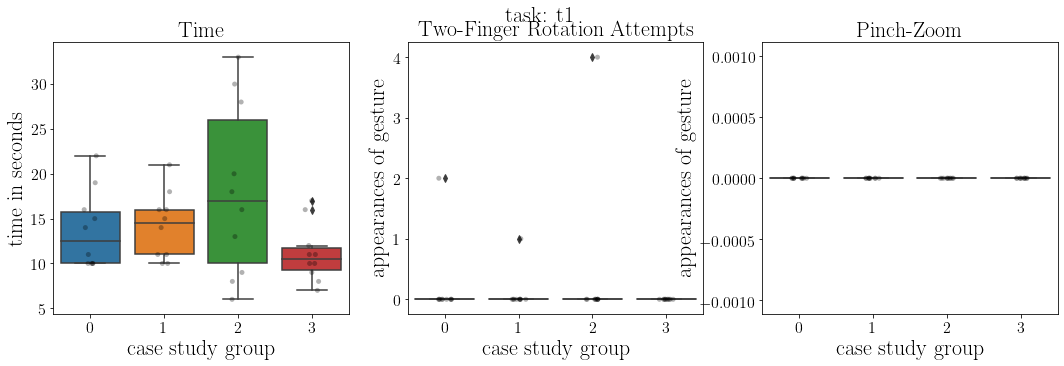

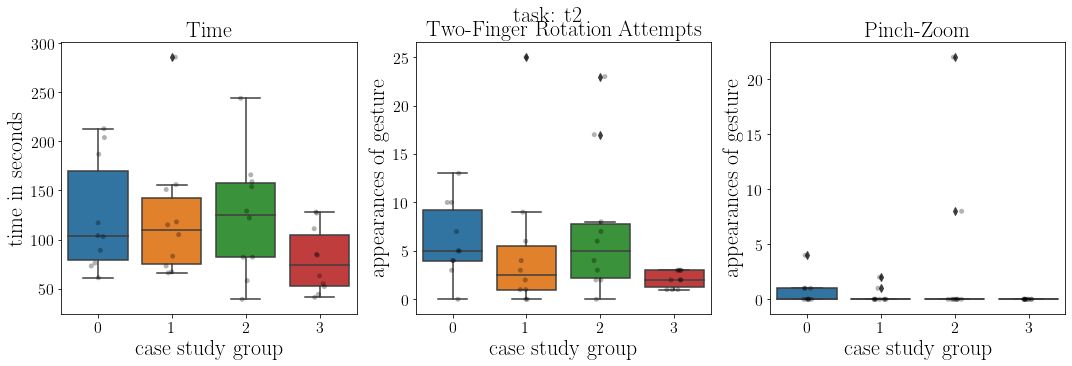

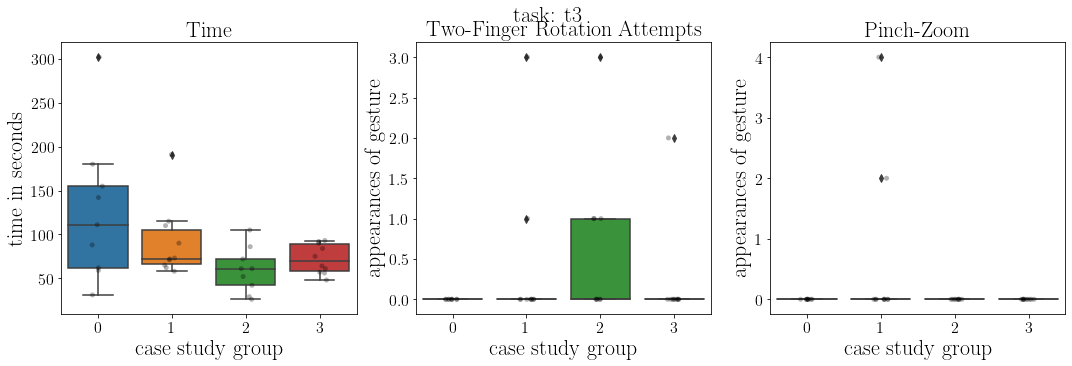

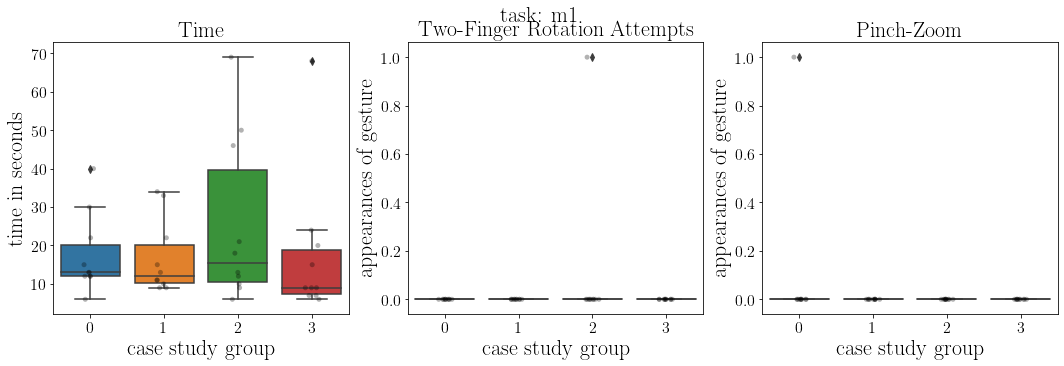

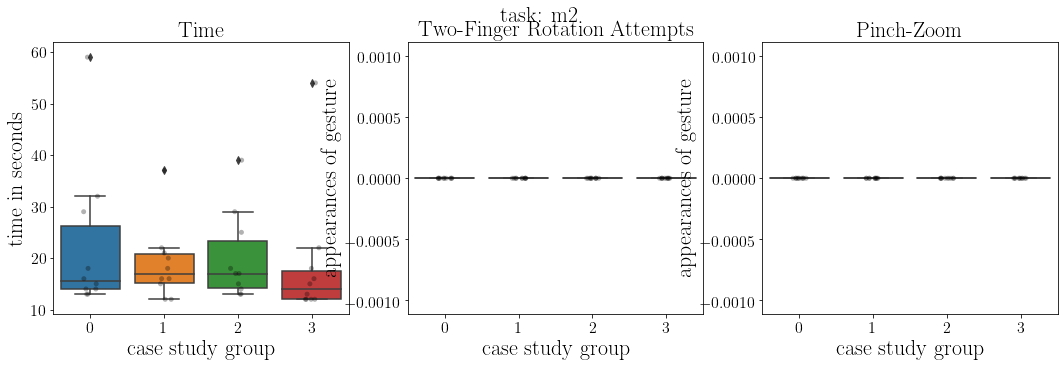

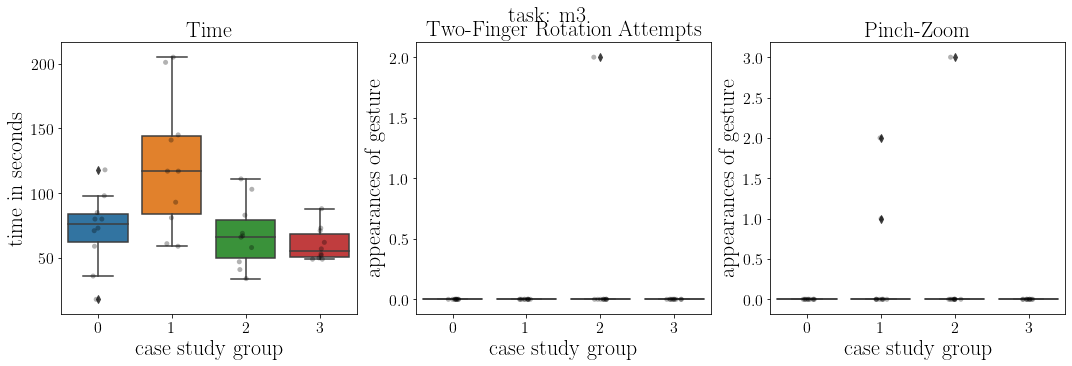

In [37]:
print('BOXPLOTS FOR GESTURE APPEARANCES AND TIMES PER TASK - FOR ALL TASKS')

task_names = ['t1','t2','t3','m1','m2','m3']
for task in task_names:
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    col_str = task + '_time'
    sns.boxplot(y=df[col_str], x=df["lvl"], whis=1.5, ax=axs[0])
    sns.stripplot(y=df[col_str], x=df["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[0])
    axs[0].set_title("Time")
    axs[0].set_ylabel("time in seconds")

    col_str = task + '_tfr'
    df_nonzero = df#[df[col_str] != 0] #for excluding zero-instances (does not work with the plot function)
    sns.boxplot(y=col_str, x="lvl", data=df_nonzero, whis=1.5, ax=axs[1])
    sns.stripplot(y=df_nonzero[col_str], x=df_nonzero["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[1])
    axs[1].set_title("Two-Finger Rotation Attempts")
    axs[1].set_ylabel("appearances of gesture")

    col_str = task + '_pinch'
    df_nonzero = df#df[df[col_str] != 0]
    sns.boxplot(y=col_str, x="lvl", data=df_nonzero, whis=1.5, ax=axs[2])
    sns.stripplot(y=df_nonzero[col_str], x=df_nonzero["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[2])
    axs[2].set_title("Pinch-Zoom")
    axs[2].set_ylabel("appearances of gesture")

    for a in axs:
        a.set_xlabel('case study group')

    plt.suptitle(('task: ' + task))
    plt.show()


In [38]:
# Kruskal Wallis tests for the 2nd task of the toaster

stat_col = ['task','group','#_tfr','h','p','eta2','median','median_diff']
df_stats = pd.DataFrame(columns=stat_col)

for group in range(1, 4):
    for task in ['t2']:
        num_tfr = df[(df['lvl'] == group)][task+'_tfr'].sum()
        
        p = stats.kruskal(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr']).pvalue
        h = stats.kruskal(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr']).statistic
        eta2 = (h - 2 + 1) / (20 - 2)  # eta2[H] = (H - k + 1)/(n - k)
        median = df[(df['lvl'] == group)][task+'_tfr'].median()
        median_diff = df[(df['lvl'] == group)][task+'_tfr'].median() - df[(df['lvl'] == 0)][task+'_tfr'].median()

        df_stats = df_stats.append(pd.Series([task,group,num_tfr,h,p,eta2,median,median_diff], index = stat_col), ignore_index=True)

df_stats

,task,group,#_tfr,h,p,eta2,median,median_diff
0,t2,1,51,1.974,0.160,0.054,2.500,-2.500
1,t2,2,72,0.071,0.791,-0.052,5.000,0.000
2,t2,3,21,8.448,0.004,0.414,2.000,-3.000


In [47]:
df_stats.to_csv("task_t2_results.csv")

## Create plots

make: plot_tfr.pdf and plot_pz.pdf


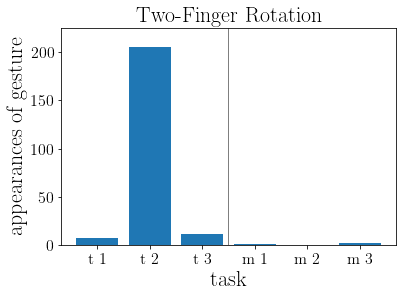

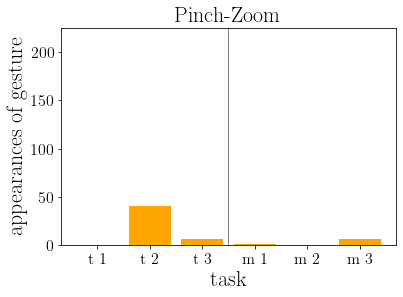

In [40]:
print('make: plot_tfr.pdf and plot_pz.pdf')
TFR = [df.loc[:,"t1_tfr"].sum(), df.loc[:,"t2_tfr"].sum(), df.loc[:,"t3_tfr"].sum(), df.loc[:,"m1_tfr"].sum(), df.loc[:,"m2_tfr"].sum(), df.loc[:,"m3_tfr"].sum()]
PZ = [df.loc[:,"t1_pinch"].sum(), df.loc[:,"t2_pinch"].sum(), df.loc[:,"t3_pinch"].sum(), df.loc[:,"m1_pinch"].sum(), df.loc[:,"m2_pinch"].sum(), df.loc[:,"m3_pinch"].sum()]

plt.bar(height=TFR, x=["t 1","t 2","t 3","m 1","m 2","m 3"])
axes = plt.gca()
axes.set_ylim([0,225])
plt.axvline(x=2.5, linewidth=0.5, color='black')
plt.title("Two-Finger Rotation")
plt.xlabel("task")
plt.ylabel("appearances of gesture")
plt.savefig('plot_tfr.pdf', bbox_inches='tight')
plt.show()

plt.bar(height=PZ, x=["t 1","t 2","t 3","m 1","m 2","m 3"], color='orange')
axes = plt.gca()
axes.set_ylim([0,225])
plt.axvline(x=2.5, linewidth=0.5, color='black')
plt.title("Pinch-Zoom")
plt.xlabel("task")
plt.ylabel("appearances of gesture")
plt.savefig('plot_pz.pdf', bbox_inches='tight')
plt.show()

make: plot_bplot_time.pdf


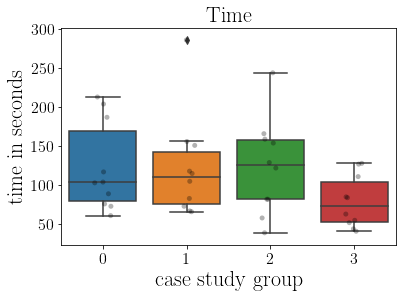

In [41]:
print('make: plot_bplot_time.pdf')
plt.figure()
bplot = sns.boxplot(y=df["t2_time"], x=df["lvl"], whis=1.5)
plt.title("Time")
bplot = sns.stripplot(y=df["t2_time"], x=df["lvl"], jitter=True, marker='o', alpha=0.3,color='black')
plt.xlabel("case study group")
plt.ylabel("time in seconds")
plt.savefig('plot_bplot_time.pdf', bbox_inches='tight')
plt.show()

make: plot_bplot_tfr.pdf


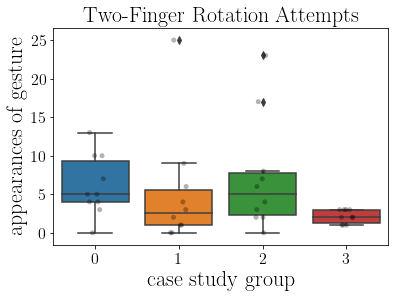

In [42]:
print('make: plot_bplot_tfr.pdf')
df_t2_tfr = df.loc[:,['lvl','t2_tfr']]
#df_t2_tfr = df_t2_tfr[df_t2_tfr.t2_tfr != 0]
#print("shape after dropping 0s for tfr: ", df_t2_tfr.shape[0])

plt.figure()
bplot = sns.boxplot(y="t2_tfr", x="lvl", data=df_t2_tfr, whis=1.5)
plt.title("Two-Finger Rotation Attempts")
bplot = sns.stripplot(y=df_t2_tfr["t2_tfr"], x=df_t2_tfr["lvl"], jitter=True, marker='o', alpha=0.3,color='black')
plt.xlabel("case study group")
plt.ylabel("appearances of gesture")
plt.savefig('plot_bplot_tfr.pdf', bbox_inches='tight')
plt.show()

make: plot_scatter.pdf
Correlation matrix: (Pearsons CC)
 [[1.         0.42880902]
 [0.42880902 1.        ]]
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


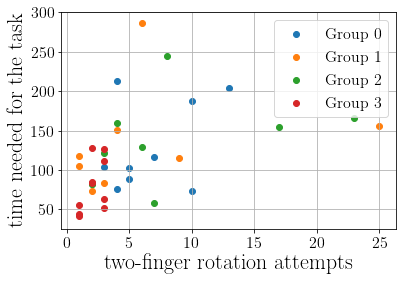

In [43]:

print('make: plot_scatter.pdf')
df_t2_corr = df.loc[:,['lvl','t2_tfr','t2_time']][df.t2_tfr != 0]
df.loc[:,'group'] = df.loc[:,'lvl']

print("Correlation matrix: (Pearsons CC)\n", np.corrcoef(x=df_t2_corr["t2_tfr"], y=df_t2_corr['t2_time']))

df_t2_corr = df.loc[:,['lvl','t2_tfr','t2_time']][df.t2_tfr != 0]
df.loc[:,'group'] = df.loc[:,'lvl']

for i in range(4):
    plt.scatter(x=df_t2_corr[df['group']==i]['t2_tfr'], y=df_t2_corr[df['group']==i]['t2_time'], edgecolors='face')
plt.grid('on')
plt.xlabel('two-finger rotation attempts')
plt.ylabel('time needed for the task')
plt.legend(['Group 0','Group 1','Group 2','Group 3'])
plt.savefig('plot_scatter.pdf', bbox_inches='tight')
plt.show()

## Questionnaire evaluation



make: plot_sus.pdf


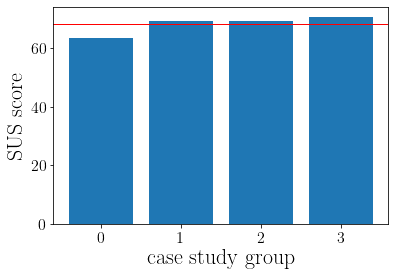

make: plot_tags.pdf


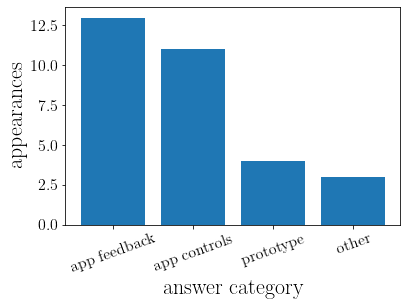

make plot_tags_implementations.pdf


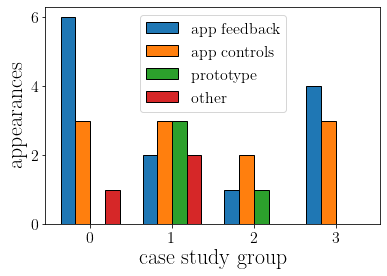

In [44]:

sus_df = df.copy()
sus_df.drop(['date', 'timestamp', 'issues', 'offscreen', '1_Age', '2_priorExp', 'oq'], axis=1, inplace=True)

odd_q = ['3_SUS_1', '5_SUS_3', '7_SUS_5', '9_SUS_7', '11_SUS_9']
even_q = ['4_SUS_2', '6_SUS_4', '8_SUS_6', '10_SUS_8', '12_SUS_10']
all_q = odd_q + even_q

for question in odd_q:
    sus_df[question] = sus_df[question] - 1
for question in even_q:
    sus_df[question] = 5 - sus_df[question]
sus_df['total'] = 0
for question in all_q:
    sus_df['total'] = sus_df['total'] + sus_df[question]
sus_df['total'] *= 2.5 

implementations = ["TM0", "MT0", "TM1", "MT1", "TM2", "MT2","TM3","MT3"]

sus_result = np.zeros(8)

for index, version in enumerate(implementations):
    sus_result[index]= sus_df.loc[(sus_df['implementation'] == version),'total'].mean()
    #print(index, sus_result[index])






print('make: plot_sus.pdf')
sus_result_imp = np.zeros(4)

for i in range(4):
    sus_result_imp[i] = (sus_result[2*i] + sus_result[2*i+1]) / 2
    
plt.bar(height=sus_result_imp, x=["0","1","2","3"])
plt.axhline(y=68, linewidth=1, color='r')
plt.ylabel('SUS score')
plt.xlabel('case study group')
plt.savefig('plot_sus.pdf', bbox_inches='tight')
plt.show()






print('make: plot_tags.pdf')
tag = np.asarray([df.tag1.sum(),df.tag2.sum(),df.tag3.sum(),df.tag4.sum()])

plt.bar(height=tag, x=["app feedback","app controls","prototype","other"])

plt.savefig('plot_tags.pdf')
plt.ylabel('appearances')
plt.xlabel('answer category')
plt.xticks(rotation=20)
plt.savefig('plot_tags.pdf', bbox_inches='tight')
plt.show()






print('make plot_tags_implementations.pdf')
barWidth = 0.18
 
# Choose the height of the blue bars
bars1 = [df[df["lvl"] == 0]["tag1"].sum(), df[df["lvl"] == 1]["tag1"].sum(), df[df["lvl"] == 2]["tag1"].sum(), df[df["lvl"] == 3]["tag1"].sum()]
bars2 = [df[df["lvl"] == 0]["tag2"].sum(), df[df["lvl"] == 1]["tag2"].sum(), df[df["lvl"] == 2]["tag2"].sum(), df[df["lvl"] == 3]["tag2"].sum()]
bars3 = [df[df["lvl"] == 0]["tag3"].sum(), df[df["lvl"] == 1]["tag3"].sum(), df[df["lvl"] == 2]["tag3"].sum(), df[df["lvl"] == 3]["tag3"].sum()]
bars4 = [df[df["lvl"] == 0]["tag4"].sum(), df[df["lvl"] == 1]["tag4"].sum(), df[df["lvl"] == 2]["tag4"].sum(), df[df["lvl"] == 3]["tag4"].sum()]
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
r4 = [x + 3*barWidth for x in r1]

# Create bars
plt.bar(r1, bars1, width = barWidth, label='app feedback', edgecolor="black") 
plt.bar(r2, bars2, width = barWidth, label='app controls', edgecolor="black")
plt.bar(r3, bars3, width = barWidth, label='prototype', edgecolor="black")
plt.bar(r4, bars4, width = barWidth, label='other', edgecolor="black")

# general layout
plt.xticks([r + 1.5* barWidth for r in range(len(bars1))], ['0', '1', '2', '3'])
plt.ylabel('appearances')
plt.xlabel('case study group')
plt.legend()
# Show and save graphic
plt.savefig('plot_tags_implementations.pdf', bbox_inches='tight')
plt.show()


In [45]:
# Kruskal Wallis tests for the 2nd task of the toaster

sus_stat_col = ['group','h','p','eta2','median','median_diff']
sus_stats = pd.DataFrame(columns=sus_stat_col)

for group in range(1, 4):    
        p = stats.kruskal(df[(df['lvl'] == 0)]['sus'], df[(df['lvl'] == group)]['sus']).pvalue
        h = stats.kruskal(df[(df['lvl'] == 0)]['sus'], df[(df['lvl'] == group)]['sus']).statistic
        eta2 = (h - 2 + 1) / (20 - 2)  # eta2[H] = (H - k + 1)/(n - k)
        median = df[(df['lvl'] == group)]['sus'].median()
        median_diff = df[(df['lvl'] == group)]['sus'].median() - df[(df['lvl'] == 0)]['sus'].median()

        sus_stats = sus_stats.append(pd.Series([group,h,p,eta2,median,median_diff], index = sus_stat_col), ignore_index=True)

sus_stats

,group,h,p,eta2,median,median_diff
0,1.000,1.053,0.305,0.003,71.250,2.500
1,2.000,0.117,0.733,-0.049,66.250,-2.500
2,3.000,0.013,0.910,-0.055,66.250,-2.500


In [46]:
sus_stats.to_csv('sus_stats_results.csv')